In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from brian2 import *
from brian2tools import *
import numpy as np
import pandas as pd


# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        'font.size': 22,
        'ytick.color' : 'black',
        "xtick.color" : 'black',
        'axes.labelcolor' : 'black',
        'axes.edgecolor' : 'black'
	}
)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
n_points = 200
n_samples = 1
vec_alpha = [0.1, 0.3, 0.7]

vec_alpha = np.array(vec_alpha)

EL = -60*mV
EE = 0*mV
EI = -80*mV
tauA = 1*ms
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
vt = -50*mV

eqs = '''
dv/dt = ((EL - v) + ((1 - alpha)*gA + alpha*gN)*(EE - v) + gI*(EI - v))/tauL : volt (unless refractory)
dgA/dt = -gA/tauA : 1
dgN/dt = -gN/tauN : 1
dgI/dt = -gI/tauI : 1
alpha : 1
'''

rate = 5
dic_V_evol = {}

for alpha_value in vec_alpha:
	start_scope()
	defaultclock.dt = 0.001*ms
	print(alpha_value, end=' ')
	G = NeuronGroup(1, eqs, threshold='v>vt', reset='v=EL', refractory=2*ms, method='rk4')
	GPA = PoissonGroup(400, rates=rate*Hz)
	GPN = PoissonGroup(400, rates=rate*Hz)
	GPI = PoissonGroup(100, rates=rate*Hz)

	SA = Synapses(GPA, G, 'w : 1', on_pre='gA += w')
	SN = Synapses(GPN, G, 'w : 1', on_pre='gN += w')
	SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
	SA.connect()
	SN.connect()
	SI.connect()

	G.v = EL
	SA.w = 0.1
	SN.w = 0.1
	SI.w = 0.4

	G.alpha = alpha_value
	
	run(5000*ms)

	M = StateMonitor(G, 'v', record=True)

	run(20000*ms)
	dic_V_evol[alpha_value] = M.v[0]/mV




0.1 0.3 0.7 

In [ ]:
V_data_path = "../../Data/V_data/"
pd.DataFrame(dic_V_evol).to_csv(f"{V_data_path}V_distr_Interpolated.dat")

(array([8.32586131e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.00003381e-05, 2.00001353e-03,
        1.17000791e-02, 3.47002347e-02, 7.01004741e-02, 9.23006242e-02,
        9.10506158e-02, 7.07004781e-02, 3.14502127e-02, 9.85006662e-03,
        2.35001589e-03, 5.00003381e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000676e-04, 6.50004396e-04, 1.55001048e-03,
        4.75003212e-03, 7.85005309e-03, 1.38500937e-02, 2.37501606e-02,
        3.37002279e-02, 3.94002665e-02, 4.76003219e-02, 4.705031

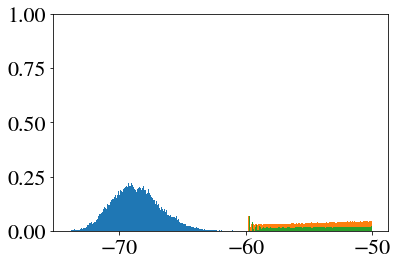

In [4]:
# plt.hist
plt.ylim(0,1)
plt.hist(dic_V_evol[0], bins=1000, density=True)
plt.hist(dic_V_evol[0.2], bins=1000, density=True)
plt.hist(dic_V_evol[0.5], bins=1000, density=True)
# dic_V_evol[100]